In [1]:
# Gdata, G2, G3

In [1]:
import igraph
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from random import shuffle
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [2]:
G_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ";")
G_2 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ";")
G_3x = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ";")
G_3 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [3]:
G_data.head() #G_data can be used here

node1  node2  timestamp
0      1      2          1
1      1      3          1
2      1      4          1
3      1      5          1
4      1      6          1

In [4]:
from random import shuffle

In [5]:
timestamp_g2 = G_data.timestamp
timestamp_g2 = list(timestamp_g2)
shuffle(timestamp_g2)
print(timestamp_g2[0:5])

[35624, 24696, 29303, 44420, 14477]


In [6]:
for i in range(len(G_2)):
    G_2.timestamp[i]=timestamp_g2[i]

In [7]:
G_2.timestamp[0:5]

0    35624
1    24696
2    29303
3    44420
4    14477
Name: timestamp, dtype: int64

In [9]:
G_2.head() #G_2 can be used here

node1  node2  timestamp
0      1      2      35624
1      1      3      24696
2      1      4      29303
3      1      5      44420
4      1      6      14477

In [10]:
G_2 = G_2.sort_values(by=['timestamp'])
G_2.head()

node1  node2  timestamp
64451     42     69          1
35894     21     76          1
18825      3     35          1
36143     53     68          1
62214      2     59          1

In [11]:
timestamp_g3=list(G_3x.timestamp)

In [12]:
from random import seed
from random import randint
seed(1)

In [13]:
randint(0, len(G_3x)-1)

17611

In [22]:
#for i in range(len(G_3x)):
#    G_3x.timestamp[i]=0
#    G_3x.timestamp[randint(0, len(G_3x)-1)]=\
#    timestamp_g3[i]

In [23]:
#for i in range(len(G_3x)):
#    if(G_3x.timestamp[i]==0):
#        G_3x.drop([i], axis=0)

In [24]:
##G_3.head()

In [25]:
#G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv')

In [14]:
# G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv') #this cost a lot of time so I write into csv
# so you can just run 
G_3 = pd.read_csv("G_3.csv", sep = ",")

In [15]:
G_3.head()

Unnamed: 0  node1  node2  timestamp
0           0      1      2      18314
1           1      1      3      40488
2           2      1      4      46297
3           3      1      5      37662
4           5      1      7      47549

In [16]:
G_3 = G_3.drop(columns=['Unnamed: 0'])

In [17]:
G_3 = G_3.sort_values(by=['timestamp'])
G_3.head()

node1  node2  timestamp
76      62     63        431
321     26     62        446
295      9     74        460
404     10     54        778
255     62     69        807

### 15)

In [18]:
keymax=max(G_2.timestamp)
keymax

57791

## Network G

In [19]:
graph_data_nodes = G_data.drop(["timestamp"], axis=1)

In [20]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [21]:
key = range(1,keymax+1)
G_Temp = dict([(k,[]) for k in key])

for i in range(len(G_predata)):
    G_Temp[G_data.timestamp[i]].append(G_predata[i])
print(G_Temp[keymax])

[(85, 94)]


In [22]:
## simulating G

In [141]:
List_dict = {}
List_dict = List_dict.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict[i].append(len(infected))
            
        if flag==1:
            break


In [142]:
#variance G
var_dict = {}

for i in range(1, len(List_dict)+1):
    var = np.var(List_dict[i])
    var_dict[i] = var

print(var_dict)

{1: 9.66259098569328, 2: 9.65262289791674, 3: 9.65262289791674, 4: 10.19470041952024, 5: 10.77786941087884, 6: 11.413030226971205, 7: 12.1108680841909, 8: 12.097457779052675, 9: 12.08376062246764, 10: 12.069776614435801, 11: 12.654236437305029, 12: 12.65452328875184, 13: 12.658467496145432, 14: 20.106206748180288, 15: 20.177059055541612, 16: 20.177059055541612, 17: 20.177059055541612, 18: 21.035677148696614, 19: 21.91688479328767, 20: 21.890422747319732, 21: 21.901036250851583, 22: 24.19778407257342, 23: 24.20223026999893, 24: 24.182078955860735, 25: 25.2075728781957, 26: 37.00261751945211, 27: 36.960522069633186, 28: 36.960522069633186, 29: 36.960522069633186, 30: 36.960522069633186, 31: 36.92079314425042, 32: 36.88041880311233, 33: 38.062533615403936, 34: 41.37466384596077, 35: 41.37502241026929, 36: 41.37502241026929, 37: 41.327620208684436, 38: 41.65047151206568, 39: 41.65047151206568, 40: 41.65047151206568, 41: 45.14037792678117, 42: 46.48965541969954, 43: 49.08881637921762, 44: 5

In [143]:
#average
average_dict = {}

for i in range(1, len(List_dict)+1):
    var = np.average(List_dict[i])
    average_dict[i] = var

average_dict.values()

dict_values([1.910179640718563, 1.9221556886227544, 1.9221556886227544, 1.9461077844311376, 1.9760479041916168, 2.0119760479041915, 2.053892215568862, 2.065868263473054, 2.0778443113772456, 2.089820359281437, 2.1497005988023954, 2.1676646706586826, 2.1736526946107784, 2.5089820359281436, 2.532934131736527, 2.532934131736527, 2.532934131736527, 2.568862275449102, 2.5988023952095807, 2.6107784431137726, 2.6167664670658684, 2.7005988023952097, 2.718562874251497, 2.7365269461077846, 2.7904191616766467, 3.251497005988024, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.281437125748503, 3.2994011976047903, 3.3592814371257487, 3.467065868263473, 3.4730538922155687, 3.4730538922155687, 3.4850299401197606, 3.5269461077844313, 3.5269461077844313, 3.5269461077844313, 3.6407185628742513, 3.718562874251497, 3.8622754491017965, 3.9820359281437128, 4.0359281437125745, 5.179640718562874, 5.227544910179641, 5.3532934131736525, 5.461077844311378, 5.461077844311378, 5.46

## Network G2

In [23]:
G_2_nodes = G_2.drop(["timestamp"], axis=1)

In [26]:
G2_predata = [tuple(x) for x in G_2_nodes.values]

In [27]:
key = range(1,keymax+1)
G2_Temp = dict([(k,[]) for k in key])

for i in range(len(G_2_predata)):
    G2_Temp[G_2.timestamp[i]].append(G2_predata[i])
print(G2_Temp[keymax])

[(35, 107)]


In [45]:
G2_Temp

{1: [(56, 88),
  (1, 12),
  (33, 42),
  (3, 17),
  (9, 117),
  (24, 83),
  (33, 117),
  (3, 8),
  (31, 71),
  (44, 88),
  (10, 54),
  (15, 56),
  (27, 62),
  (21, 86),
  (23, 86),
  (13, 14)],
 2: [(20, 33)],
 3: [(53, 68)],
 4: [(15, 50)],
 5: [(86, 123)],
 6: [(68, 84)],
 7: [(3, 51)],
 8: [(66, 77)],
 9: [(45, 83)],
 10: [(17, 54)],
 11: [(18, 69)],
 12: [(4, 13)],
 13: [(14, 59)],
 14: [(72, 73), (66, 67), (21, 84), (59, 69)],
 15: [(20, 57)],
 16: [(18, 109)],
 17: [(1, 8)],
 18: [(13, 40)],
 19: [(17, 40)],
 20: [(23, 111), (69, 76)],
 21: [(3, 68)],
 22: [(27, 38)],
 23: [(83, 149)],
 24: [(36, 150)],
 25: [(15, 88)],
 26: [(3, 50), (71, 117), (3, 17), (66, 90), (38, 84), (12, 61)],
 27: [(14, 65)],
 28: [(71, 72)],
 29: [(72, 80)],
 30: [(19, 88)],
 31: [(33, 61)],
 32: [(2, 20)],
 33: [(65, 94)],
 34: [(3, 13)],
 35: [(2, 33)],
 36: [(88, 94)],
 37: [(53, 76)],
 38: [(32, 45)],
 39: [(2, 58)],
 40: [(6, 43)],
 41: [(30, 47)],
 42: [(42, 63)],
 43: [(15, 61)],
 44: [(93, 98)],


In [102]:
## simulating G2

In [103]:
#dict_infected_all = {}
#seed = 2

List_dict_G2 = {}
List_dict_G2 = List_dict_G2.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict_G2[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G2_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G2_Temp[i][j][0] in infected) | (G2_Temp[i][j][1] in infected):
                    infected.extend(list(G2_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict_G2[i].append(len(infected))
        
        #Temp_I[i] = len(infected)
            
        if flag==1:
            break


In [104]:
# variance G2
var_dict_G2 = {}

for i in range(1, len(List_dict_G2)+1):
    var = np.var(List_dict_G2[i])
    var_dict_G2[i] = var

print(var_dict_G2)

{1: 0.4216716268062678, 2: 0.4277672200509162, 3: 0.43357596184875746, 4: 0.4390978521997921, 5: 0.470794937071964, 6: 0.5018466061888199, 7: 0.5062210907526264, 8: 0.5361970669439564, 9: 0.5398544228907457, 10: 0.7034314604324288, 11: 0.9270321632184734, 12: 0.9533507834630143, 13: 0.9545699021119436, 14: 1.9300082469790958, 15: 1.9503029868406894, 16: 2.031338520563663, 17: 2.0505575674997307, 18: 2.047043637276346, 19: 2.08705941410592, 20: 3.0603463731220186, 21: 3.6200652587041495, 22: 3.6548459966294944, 23: 3.712933414607911, 24: 4.174477392520349, 25: 4.230628563232815, 26: 6.588260604539424, 27: 7.379683746279895, 28: 8.01814335401054, 29: 8.164939581914018, 30: 9.153644806195992, 31: 10.393703610742584, 32: 10.369536376349098, 33: 10.951844813367273, 34: 10.951844813367273, 35: 10.92609989601635, 36: 10.933629746495034, 37: 11.200258166302124, 38: 11.811610312309512, 39: 13.04750977087741, 40: 14.430850873104088, 41: 14.699630678762235, 42: 16.676610850155978, 43: 16.67661085

In [105]:
# average G2
average_dict_G2 = {}

for i in range(1, len(List_dict_G2)+1):
    var = np.average(List_dict_G2[i])
    average_dict_G2[i] = var

average_dict_G2.values()

dict_values([1.2395209580838322, 1.251497005988024, 1.2634730538922156, 1.2754491017964071, 1.2934131736526946, 1.311377245508982, 1.3233532934131738, 1.341317365269461, 1.3532934131736527, 1.3832335329341316, 1.4251497005988023, 1.4431137724550898, 1.4550898203592815, 1.592814371257485, 1.6107784431137724, 1.622754491017964, 1.6407185628742516, 1.652694610778443, 1.6766467065868262, 1.7964071856287425, 1.8562874251497006, 1.874251497005988, 1.8922155688622755, 1.9281437125748504, 1.9461077844311376, 2.215568862275449, 2.2634730538922154, 2.2994011976047903, 2.341317365269461, 2.4191616766467066, 2.502994011976048, 2.5149700598802394, 2.568862275449102, 2.568862275449102, 2.5808383233532934, 2.604790419161677, 2.6407185628742513, 2.6766467065868262, 2.754491017964072, 2.844311377245509, 2.8862275449101795, 3.0059880239520957, 3.0059880239520957, 3.125748502994012, 3.1497005988023954, 3.7365269461077846, 3.784431137724551, 3.81437125748503, 4.017964071856287, 4.11377245508982, 4.2215568

## Network G3

In [29]:
G_3_nodes = G_3.drop(["timestamp"], axis=1)

In [30]:
G3_predata = [tuple(x) for x in G_3_nodes.values]

In [33]:
key = range(1,keymax+1)
G3_Temp = dict([(k,[]) for k in key])

for i in range(len(G3_predata)):
    G3_Temp[G_3.timestamp[i]].append(G3_predata[i])
print(G3_Temp[keymax])

[(61, 96)]


In [34]:
len(G3_Temp)

57791

In [121]:
## simulating G3

In [122]:
List_dict_G3 = {}
List_dict_G3 = List_dict_G3.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict_G3[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G3_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G3_Temp[i][j][0] in infected) | (G3_Temp[i][j][1] in infected):
                    infected.extend(list(G3_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict_G3[i].append(len(infected))
        
        if flag==1:
            break


In [123]:
# variance G3
var_dict_G3 = {}

for i in range(1, len(List_dict_G3)+1):
    var = np.var(List_dict_G3[i])
    var_dict_G3[i] = var

print(var_dict_G3)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.0, 108: 0.0, 109: 0.0, 110: 0.0, 111: 0.

In [124]:
# average G3
average_dict_G3 = {}

for i in range(1, len(List_dict_G3)+1):
    var = np.average(List_dict_G3[i])
    average_dict_G3[i] = var

average_dict_G3.values()

dict_values([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

## Plot

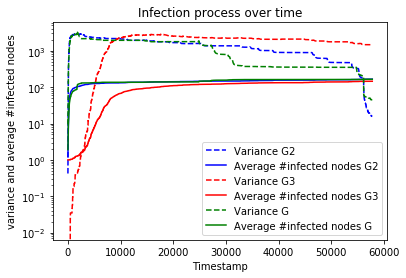

In [144]:
## G2
names_var_G2 = list(var_dict_G2.keys())
values_var_G2 = list(var_dict_G2.values())
names_average_G2 = list(average_dict_G2.keys())
values_average_G2 = list(average_dict_G2.values())

# Variables for variance G2
y1 = values_var_G2 
x1 = range(len(var_dict_G2))

# Variables for average G2 
y2 = values_average_G2 
x2 = range(len(average_dict_G2))

## G3
names_var_G3 = list(var_dict_G3.keys())
values_var_G3 = list(var_dict_G3.values())
names_average_G3 = list(average_dict_G3.keys())
values_average_G3 = list(average_dict_G3.values())

# Variables for variance G3
y3 = values_var_G3
x3 = range(len(var_dict_G3))

# Variables for average G3
y4 = values_average_G3
x4 = range(len(average_dict_G3))

## G
names_var = list(var_dict.keys())
values_var = list(var_dict.values())
names_average = list(average_dict.keys())
values_average = list(average_dict.values())

# Variables for variance G
y5 = values_var 
x5 = range(len(var_dict))

# Variables for average G
y6 = values_average 
x6 = range(len(average_dict))



plt.plot(x1, y1, 'b--', label='Variance G2')
plt.plot(x2, y2, 'blue', label='Average #infected nodes G2')

plt.plot(x3, y3, 'r--', label='Variance G3')
plt.plot(x4, y4, 'red', label='Average #infected nodes G3')


plt.plot(x5, y5, 'g--', label='Variance G')
plt.plot(x6, y6, 'green', label='Average #infected nodes G')

plt.yscale('log')
plt.ylabel('variance and average #infected nodes')
plt.xlabel('Timestamp')
plt.title('Infection process over time')
plt.legend()
plt.show()

## Information spreading performance G, G2 and G3

In [35]:
#iteration N=10
N=166

## Network G2

In [37]:
Time_80_G2=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G2_Temp[i])):
            if (len(infected) < 133):
                if (G2_Temp[i][j][0] in infected) | (G2_Temp[i][j][1] in infected):
                    infected.extend(list(G2_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80_G2.append([time,seed])

In [46]:
Time_80_G2_ranked=sorted(Time_80_G2)
Time_80_G2_ranked

[[1720, 1],
 [1720, 2],
 [1720, 3],
 [1720, 4],
 [1720, 5],
 [1720, 6],
 [1720, 8],
 [1720, 9],
 [1720, 10],
 [1720, 11],
 [1720, 12],
 [1720, 13],
 [1720, 14],
 [1720, 15],
 [1720, 17],
 [1720, 18],
 [1720, 19],
 [1720, 20],
 [1720, 21],
 [1720, 22],
 [1720, 23],
 [1720, 24],
 [1720, 26],
 [1720, 27],
 [1720, 29],
 [1720, 30],
 [1720, 31],
 [1720, 32],
 [1720, 33],
 [1720, 35],
 [1720, 36],
 [1720, 38],
 [1720, 39],
 [1720, 40],
 [1720, 42],
 [1720, 43],
 [1720, 44],
 [1720, 45],
 [1720, 47],
 [1720, 48],
 [1720, 49],
 [1720, 50],
 [1720, 51],
 [1720, 53],
 [1720, 54],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 59],
 [1720, 61],
 [1720, 62],
 [1720, 63],
 [1720, 65],
 [1720, 66],
 [1720, 67],
 [1720, 68],
 [1720, 69],
 [1720, 70],
 [1720, 71],
 [1720, 72],
 [1720, 73],
 [1720, 74],
 [1720, 75],
 [1720, 76],
 [1720, 77],
 [1720, 79],
 [1720, 80],
 [1720, 83],
 [1720, 84],
 [1720, 85],
 [1720, 86],
 [1720, 88],
 [1720, 90],
 [1720, 93],
 [1720, 94],
 [1720, 95],
 [1720, 96],
 [1720,

In [39]:
R2=np.zeros(N)
print()
for i in range(N):
    R2[i]=Time_80_G2_ranked[i][1]
R2

array([  1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        26.,  27.,  29.,  30.,  31.,  32.,  33.,  35.,  36.,  38.,  39.,
        40.,  42.,  43.,  44.,  45.,  47.,  48.,  49.,  50.,  51.,  53.,
        54.,  56.,  57.,  58.,  59.,  61.,  62.,  63.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  79.,
        80.,  83.,  84.,  85.,  86.,  88.,  90.,  93.,  94.,  95.,  96.,
        98., 100., 101., 104., 106., 108., 109., 112., 115., 117., 121.,
       123., 142., 149., 150.,   7.,  16.,  25.,  34.,  37.,  41.,  46.,
        52.,  55.,  60.,  64.,  81.,  82.,  87.,  89., 103., 105., 111.,
       113., 128., 141., 143.,  28.,  78.,  99., 107., 118., 124., 139.,
        91.,  92., 116., 138., 102., 120., 134., 151., 119., 122., 140.,
       145., 146., 110., 153., 126., 148., 132., 136.,  97., 144., 154.,
       152., 135., 130., 165., 160., 125., 147., 12

## Network G3

In [49]:
Time_80_G3=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G3_Temp[i])):
            if (len(infected) < 133):
                if (G3_Temp[i][j][0] in infected) | (G3_Temp[i][j][1] in infected):
                    infected.extend(list(G3_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    if time != 0: 
        Time_80_G3.append([time,seed])

In [50]:
Time_80_G3_ranked=sorted(Time_80_G3)
Time_80_G3_ranked

[[17434, 1],
 [17434, 3],
 [17434, 8],
 [17434, 9],
 [17434, 13],
 [17434, 14],
 [17434, 15],
 [17434, 17],
 [17434, 27],
 [17434, 33],
 [17434, 35],
 [17434, 36],
 [17434, 38],
 [17434, 43],
 [17434, 45],
 [17434, 47],
 [17434, 48],
 [17434, 50],
 [17434, 54],
 [17434, 66],
 [17434, 72],
 [17434, 81],
 [17434, 84],
 [17434, 92],
 [17600, 2],
 [17600, 5],
 [17600, 7],
 [17600, 21],
 [17600, 24],
 [17600, 37],
 [17600, 46],
 [17600, 49],
 [17600, 56],
 [17600, 59],
 [17600, 62],
 [17600, 63],
 [17600, 69],
 [17600, 70],
 [17600, 75],
 [17600, 76],
 [17600, 82],
 [17600, 83],
 [17600, 85],
 [17600, 91],
 [17600, 94],
 [17600, 97],
 [17600, 98],
 [17600, 109],
 [17600, 112],
 [17600, 124],
 [17600, 126],
 [17680, 4],
 [17680, 10],
 [17680, 12],
 [17680, 18],
 [17680, 19],
 [17680, 20],
 [17680, 22],
 [17680, 25],
 [17680, 26],
 [17680, 29],
 [17680, 30],
 [17680, 31],
 [17680, 32],
 [17680, 34],
 [17680, 39],
 [17680, 42],
 [17680, 44],
 [17680, 51],
 [17680, 52],
 [17680, 53],
 [17680, 5

In [52]:
R3=np.zeros(N)
print()
for i in range(len(Time_80_G3_ranked)):
    R3[i]=Time_80_G3_ranked[i][1]
R3

array([  1.,   3.,   8.,   9.,  13.,  14.,  15.,  17.,  27.,  33.,  35.,
        36.,  38.,  43.,  45.,  47.,  48.,  50.,  54.,  66.,  72.,  81.,
        84.,  92.,   2.,   5.,   7.,  21.,  24.,  37.,  46.,  49.,  56.,
        59.,  62.,  63.,  69.,  70.,  75.,  76.,  82.,  83.,  85.,  91.,
        94.,  97.,  98., 109., 112., 124., 126.,   4.,  10.,  12.,  18.,
        19.,  20.,  22.,  25.,  26.,  29.,  30.,  31.,  32.,  34.,  39.,
        42.,  44.,  51.,  52.,  53.,  55.,  57.,  64.,  65.,  67.,  68.,
        73.,  74.,  77.,  79.,  80.,  86.,  88.,  90.,  93.,  95.,  96.,
       101., 102., 104., 113., 115., 116., 123.,  11.,  23.,  28.,  40.,
        58.,  60.,  61.,  71., 106., 121., 148.,   6.,  41.,  78.,  89.,
       103., 105., 117., 151.,  87.,  16., 132., 108., 142., 100., 118.,
       120., 145.,  99., 107., 133., 141., 111., 128., 130., 139., 149.,
       119., 143., 146., 147., 122., 140., 110., 129., 134., 144., 138.,
       150., 135., 125., 131., 137., 153., 136., 16

## Network G

In [43]:
Time_80=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 133):
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80.append([time,seed])

In [44]:
Time_80_ranked=sorted(Time_80)
Time_80_ranked

[[1720, 1],
 [1720, 2],
 [1720, 3],
 [1720, 4],
 [1720, 5],
 [1720, 6],
 [1720, 7],
 [1720, 8],
 [1720, 9],
 [1720, 10],
 [1720, 11],
 [1720, 12],
 [1720, 13],
 [1720, 14],
 [1720, 15],
 [1720, 16],
 [1720, 17],
 [1720, 18],
 [1720, 19],
 [1720, 20],
 [1720, 21],
 [1720, 22],
 [1720, 23],
 [1720, 24],
 [1720, 25],
 [1720, 26],
 [1720, 27],
 [1720, 28],
 [1720, 29],
 [1720, 30],
 [1720, 31],
 [1720, 32],
 [1720, 33],
 [1720, 34],
 [1720, 35],
 [1720, 36],
 [1720, 37],
 [1720, 38],
 [1720, 39],
 [1720, 40],
 [1720, 41],
 [1720, 42],
 [1720, 43],
 [1720, 44],
 [1720, 45],
 [1720, 46],
 [1720, 47],
 [1720, 48],
 [1720, 49],
 [1720, 50],
 [1720, 51],
 [1720, 52],
 [1720, 53],
 [1720, 54],
 [1720, 55],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 59],
 [1720, 60],
 [1720, 61],
 [1720, 62],
 [1720, 63],
 [1720, 64],
 [1720, 65],
 [1720, 66],
 [1720, 67],
 [1720, 68],
 [1720, 69],
 [1720, 70],
 [1720, 71],
 [1720, 72],
 [1720, 73],
 [1720, 74],
 [1720, 75],
 [1720, 76],
 [1720, 77],
 [1720, 

In [47]:
R=np.zeros(N)
print()
for i in range(N):
    R[i]=Time_80_ranked[i][1]
R

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 114., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

## Compare G, G2 and G3

In [55]:
Ranked_Nodes_df = pd.DataFrame()

In [56]:
Ranked_Nodes_df['G']= R
Ranked_Nodes_df['G2']= R2
Ranked_Nodes_df['G3']= R3

In [59]:
# top ten most influencial nodes in three networks
Ranked_Nodes_df[:10]

G    G2    G3
0   1.0   1.0   1.0
1   2.0   2.0   3.0
2   3.0   3.0   8.0
3   4.0   4.0   9.0
4   5.0   5.0  13.0
5   6.0   6.0  14.0
6   7.0   8.0  15.0
7   8.0   9.0  17.0
8   9.0  10.0  27.0
9  10.0  11.0  33.0

In [60]:
#Compare G and G2
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrr2f = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    R2f = R2[:numNodes]
    InterRR2 = np.intersect1d(Rf, R2f)
    Rrr2f_i = len(InterRR2)/len(Rf)
    Rrr2f.append(Rrr2f_i)
    
print(Rrr2f)

[0.875, 0.875, 0.88, 0.8787878787878788, 0.8292682926829268, 0.84, 0.8275862068965517, 0.8181818181818182, 0.84, 0.8192771084337349]


In [61]:
#Compare G and G3
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrr3f = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    R3f = R3[:numNodes]
    InterRR3 = np.intersect1d(Rf, R3f)
    Rrr3f_i = len(InterRR3)/len(Rf)
    Rrr3f.append(Rrr3f_i)
    
print(Rrr3f)

[0.375, 0.4375, 0.36, 0.45454545454545453, 0.4634146341463415, 0.52, 0.603448275862069, 0.7121212121212122, 0.8, 0.8554216867469879]


In [62]:
#Compare G2 and G3
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rr23f = []
for i in f:
    numNodes = int(i*167)
    R2f = R2[:numNodes]
    R3f = R3[:numNodes]
    InterR23 = np.intersect1d(R2f, R3f)
    Rr23f_i = len(InterR23)/len(R2f)
    Rr23f.append(Rr23f_i)
    
print(Rr23f)

[0.5, 0.5, 0.4, 0.5151515151515151, 0.5365853658536586, 0.52, 0.6551724137931034, 0.7121212121212122, 0.76, 0.7951807228915663]


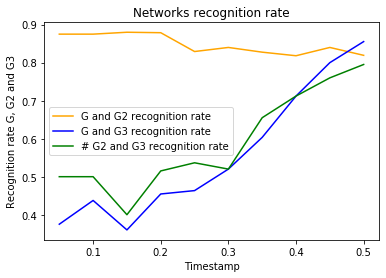

In [64]:
# G and G2 recognition rate
y1 = Rrr2f
x1 = f

# G and G3 recognition rate
y2 = Rrr3f 
x2 = f

# G2 and G3 recognition rate
y3 = Rr23f 
x3 = f

plt.plot(x1, y1, 'orange', label='G and G2 recognition rate')
plt.plot(x2, y2, 'blue', label='G and G3 recognition rate')
plt.plot(x3, y3, 'green', label='G2 and G3 recognition rate')

plt.ylabel('Recognition rate G, G2 and G3')
plt.xlabel('Timestamp')
plt.title('Networks recognition rate')
plt.legend()
plt.show()